In [74]:
import matplotlib.pyplot as plt
from numpy import genfromtxt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.ticker as mticker
import os

headers = ["event_id", "track_id", "type", "x", "y", "z", "delta_E", "process"]


def proc_file(energy):
    filepath = os.path.join(os.getcwd(), f"spectrum/{energy}/proc.txt")
    with open(f'spectrum/{energy}/log.txt', 'r') as f:
        with open(filepath, 'w') as new_f:
            for i, line in enumerate(f):
                if "ProcName" in line:
                    new_f.write(line)
                    

# generate process name files
for i in os.listdir("spectrum/"):
    if os.path.isfile(f"spectrum/{i}/log.txt"):
        proc_file(i)

def proc_list(energy, my_data):
    proc = []
    with open(f'spectrum/{energy}/proc.txt', 'r') as f:
        for i, line in enumerate(f):
            #print(my_data[i], line.split()[3])
            proc.append(line.split()[3])
            #if i > 5:
            #    break
    return proc



In [85]:
## below is from prev scripts
def search_for_thing(column, search_param, my_data):
    electron_array = []
    for i in range(len(my_data.T[0])):
        if my_data.T[column][i] == search_param:
            electron_array.append(my_data[i])
    if len(electron_array) == 0:
        print("Couldn't find anything with", headers[column], f"= {search_param}")
    else: 
        print(headers[column], f" = {search_param}")
    return np.array(electron_array)


def find_electrons(my_data):
    arr = search_for_thing(2, 1, my_data) # look for electrons
    plt.scatter(arr.T[0], arr.T[1])
    plt.xlabel("event_id")
    plt.ylabel("track_id")
    
def integrate_over(event_num, track_num, data, param = 6):
    integrate = 0
    for i in range(len(data)):
        if data.T[0][i] == event_num and data.T[1][i] == track_num:
            integrate = integrate + data.T[param][i]
    return [event_num, track_num, integrate]

def integrate_over(event_num, track_num, data, param = 6, subtract = None):
    integrate = 0
    for i in range(len(data)):
        if data.T[0][i] == event_num and data.T[1][i] == track_num:
            if not subtract:
                integrate = integrate + data.T[param][i]
            if subtract:
                ## Need to check case where next track occurs but same event
                if data.T[0][i - 1] == event_num and data.T[1][i - 1] == track_num:
                    integrate = integrate + data.T[param][i] - data.T[param][i - 1]
                else:
                    integrate = integrate + 0
    return [event_num, track_num, integrate]
    
    
def track_length_and_energy(my_data):
    # integrate energy data over track_id, event_id
    integrated_energy_by_event = []
    integrated_length_by_event_x = []
    integrated_length_by_event_y = []
    integrated_length_by_event_z = []
    for event in range(0, 20):
        for track in range(0, 20):
            integrated_energy_by_event.append(integrate_over(event, track, my_data))
            # get track lengths, `subtract = 1` shows delta track length
            integrated_length_by_event_x.append(integrate_over(event, track, my_data, param = 3, subtract = 1))
            integrated_length_by_event_y.append(integrate_over(event, track, my_data, param = 4, subtract = 1))
            integrated_length_by_event_z.append(integrate_over(event, track, my_data, param = 5, subtract = 1))

    ## convert to np arrays
    integrated_energy_by_event = np.array(integrated_energy_by_event)
    integrated_length_by_event_x = np.array(integrated_length_by_event_x)
    integrated_length_by_event_y = np.array(integrated_length_by_event_y)
    integrated_length_by_event_z = np.array(integrated_length_by_event_z)

    ## find magnitude of track lengths
    integrated_length_by_event = np.sqrt((integrated_length_by_event_x.T[2])**2 + (integrated_length_by_event_y.T[2])**2 + (integrated_length_by_event_z.T[2])**2)
    return integrated_length_by_event, integrated_energy_by_event




In [86]:
def search_for_proc(search_param, proc_list, my_data):
    proc_name = []
    for i in range(len(proc_list)):
        #print(proc_list[i])
        if proc_list[i] == search_param:
            proc_name.append(my_data[i])
            #print(proc_list[i])
    if len(proc_name) == 0:
        print("Couldn't find anything with", "process", f"= {search_param}")
    else: 
        print("ProcName", f"= {search_param}")
    return np.array(proc_name)

ProcName = eIoni


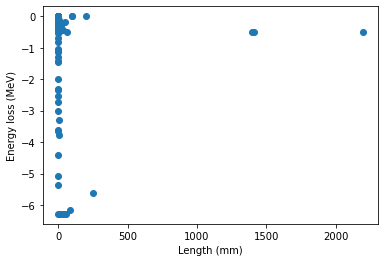

In [96]:
my_data = genfromtxt(f'spectrum/6283.8/run_nt_Hits_t0.csv', delimiter=',')

proc = proc_list(6283.8, my_data)

eioni = search_for_proc("eIoni", proc, my_data)

length, energy = track_length_and_energy(eioni)

plt.scatter(length, energy.T[2])
plt.xlabel("Length (mm)")
plt.ylabel("Energy loss (MeV)")
plt.show()

In [122]:
track1 = [1, 2, 3]
track2 = [12, 1, 1]

track_list = [1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5]
for i in track1:
    for j in track2:
        print(i - j)
        if abs(i-j) > 10:
            print("blip", i, j)

print(np.unique(track_list))

print(np.where(track1[0] - track2[0] < 10))

#def blip_or_blob(my_data):
    # sorts into blips and blobs

-11
blip 1 12
0
0
-10
1
1
-9
2
2
[1 2 3 4 5 6 7]
(array([0]),)
